In [162]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [257]:

url = "https://api.hearthstonejson.com/v1/190920/enUS/cards.json"

resp = requests.get(url, timeout=30)
resp.raise_for_status()               # raise on HTTP error
cards = resp.json()                  # list of dicts


In [260]:
df = pd.DataFrame(cards)
df.head(5)

,cardClass,dbfId,health,heroPowerDbfId,id,name,set,type,artist,rarity,...,isBattlegroundsBuddy,battlegroundsSkinParentId,battlegroundsDarkmoonPrizeTurn,countAsCopyOfDbfId,classes,puzzleType,multiClassGroup,isMiniSet,mercenariesAbilityCooldown,questReward
0,DEMONHUNTER,91661,30.0,60224.0,AIBot_DemonHunterTrainee_001_hb,DemonHunter Trainee,THE_SUNKEN_CITY,HERO,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DRUID,91662,30.0,1123.0,AIBot_DruidTrainee_002_hb,Druid Trainee,THE_SUNKEN_CITY,HERO,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SHAMAN,104998,30.0,74588.0,AIBot_Event_Ragnaros_FireFestival_02m,Fire Festival Ragnaros,TB,HERO,Anton Zemskov,FREE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,HUNTER,91663,30.0,229.0,AIBot_HunterTrainee_003_hb,Hunter Trainee,THE_SUNKEN_CITY,HERO,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MAGE,91664,30.0,807.0,AIBot_MageTrainee_004_hb,Mage Trainee,THE_SUNKEN_CITY,HERO,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df.type.unique()

array(['HERO', 'MINION', 'SPELL', 'ENCHANTMENT', 'WEAPON', 'HERO_POWER',
       'MOVE_MINION_HOVER_TARGET', 'BATTLEGROUND_HERO_BUDDY',
       'BATTLEGROUND_QUEST_REWARD', 'BATTLEGROUND_ANOMALY',
       'BATTLEGROUND_SPELL', 'LOCATION', 'LETTUCE_ABILITY', nan,
       'GAME_MODE_BUTTON'], dtype=object)

In [47]:
df[(df["type"].isin(["MINION","SPELL","ENCHANTMENT"])) & ( ~ df.id.str.contains("bot",case=False,na=False)) & (~ df.collectible.isna())].to_json("hs_valid_cards.json")

In [163]:
df_valid = pd.read_json("hs_valid_cards.json")
df_valid.columns

# columns to include - > cardClass , health, ,name, set, type, rarity, attack,cost,text,mechanics,durability,overload, spellDamage, armor,classes

Index(['cardClass', 'dbfId', 'health', 'heroPowerDbfId', 'id', 'name', 'set',
       'type', 'artist', 'rarity', 'attack', 'cost', 'faction', 'collectible',
       'flavor', 'spellSchool', 'text', 'mechanics', 'race', 'races',
       'referencedTags', 'elite', 'targetingArrowText', 'durability',
       'overload', 'spellDamage', 'battlegroundsPremiumDbfId', 'techLevel',
       'collectionText', 'hasDiamondSkin', 'howToEarnGolden', 'armor',
       'howToEarn', 'hideCost', 'hideStats', 'mercenariesRole',
       'isBattlegroundsPoolMinion', 'battlegroundsNormalDbfId',
       'battlegroundsBuddyDbfId', 'battlegroundsHero', 'isBattlegroundsBuddy',
       'battlegroundsSkinParentId', 'battlegroundsDarkmoonPrizeTurn',
       'countAsCopyOfDbfId', 'classes', 'puzzleType', 'multiClassGroup',
       'isMiniSet', 'mercenariesAbilityCooldown', 'questReward'],
      dtype='object')

In [164]:
df_final = df_valid[["cardClass", "health", "name", "set", "type", "rarity", "attack","cost","text","mechanics","durability"]]
df_final

,cardClass,health,name,set,type,rarity,attack,cost,text,mechanics,durability
12,MAGE,NaN,Flame Lance,TGT,SPELL,COMMON,NaN,5,Deal $25 damage\nto a minion.,None,NaN
13,MAGE,NaN,Effigy,TGT,SPELL,RARE,NaN,3,"<b>Secret:</b> When a friendly minion dies, su...",[SECRET],NaN
14,MAGE,2.0,Fallen Hero,TGT,MINION,RARE,3.0,2,Your Hero Power deals 1 extra damage.,[HEROPOWER_DAMAGE],NaN
15,MAGE,NaN,Arcane Blast,TGT,SPELL,EPIC,NaN,1,Deal $2 damage to a minion. This spell gets do...,[RECEIVES_DOUBLE_SPELLDAMAGE_BONUS],NaN
16,MAGE,NaN,Polymorph: Boar,TGT,SPELL,RARE,NaN,3,Transform a minion into a 4/2 Boar with <b>Cha...,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
28578,NEUTRAL,4.0,Crabrider,DARKMOON_FAIRE,MINION,COMMON,1.0,2,<b><b>Rush</b>\nWindfury</b>,"[RUSH, WINDFURY]",NaN
28580,NEUTRAL,3.0,Armor Vendor,DARKMOON_FAIRE,MINION,RARE,1.0,1,<b>Battlecry:</b> Give 4 Armor to each hero.,[BATTLECRY],NaN
28581,WARLOCK,NaN,Backfire,DARKMOON_FAIRE,SPELL,COMMON,NaN,3,Draw 3 cards. Deal $3 damage to your hero.,None,NaN
28582,NEUTRAL,9.0,Runaway Blackwing,DARKMOON_FAIRE,MINION,RARE,9.0,9,"[x]At the end of your turn,\ndeal 9 damage to ...",[TRIGGER_VISUAL],NaN


In [165]:
df_final.mechanics = df_final.mechanics.astype(str)

/var/folders/fq/yks_wlmj1wgfzs678sbpwthc0000gn/T/ipykernel_22260/1924104126.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.mechanics = df_final.mechanics.astype(str)


**ATTACK YA DA HEALTHI OLMAYAN KARTLAR SPELL OLUYOR**

In [166]:
df_final.isnull().sum()

cardClass        0
health        1604
name             0
set            114
type             0
rarity           0
attack        1604
cost             0
text            52
mechanics        0
durability    5073
dtype: int64

In [ ]:
df_nonspell = df_final.dropna(subset=["health"])


In [175]:
df_nonspell.isna().sum()

cardClass        0
health           0
name             0
set             85
type             0
rarity           0
attack           0
cost             0
text            52
mechanics        0
durability    3469
dtype: int64

In [177]:
df_nonspell.dropna(subset="set",inplace=True)

/var/folders/fq/yks_wlmj1wgfzs678sbpwthc0000gn/T/ipykernel_22260/2868469931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nonspell.dropna(subset="set",inplace=True)


In [178]:
df_nonspell.to_json("df_nonspell.json")

***lets first creat text embeddings***

In [179]:
import os
import pandas as pd
os.environ["TOKENIZERS_PARALLELISM"] = "false"

In [207]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.base import BaseEstimator, TransformerMixin
from sentence_transformers import SentenceTransformer
import re
from sklearn.preprocessing import OrdinalEncoder

#TODO : isimleri çoklayanlardan seti null olanları at.  textlerde html markdownlarından sonrasını al

In [208]:
MODEL_NAME = "intfloat/e5-small-v2"
sbert = SentenceTransformer(MODEL_NAME)
df_final_clean = pd.read_json("df_nonspell.json")

texts = df_final_clean["text"].fillna("").astype(str).tolist()


In [209]:
import html
def clean_tag(text):
    text = html.unescape(text)
    text = re.sub(r"<[^>]+>", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return  text

In [210]:
# clean the texts
texts = [clean_tag(text) for text in texts]

# use the embedder

emb = sbert.encode(texts, batch_size=64, convert_to_numpy=True, normalize_embeddings=True)
emb_dim = emb.shape[1]
emb_df = pd.DataFrame(emb, columns=[f"text_emb_{i:03d}" for i in range(emb_dim)])

In [211]:
numeric_cols = ["health", "attack"]
cat_cols     = ["cardClass", "set", "type", "rarity", "mechanics"] 
text_col     = "text"


numeric_pipe = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
])

cat_pipe = Pipeline([
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("ohe", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1,encoded_missing_value=-2)),
])


preprocess = ColumnTransformer(
    transformers=[
        ("num",  numeric_pipe, numeric_cols),
        ("cat",  cat_pipe,     cat_cols),
    ],
    remainder="drop"
)




In [232]:
from sklearn.model_selection import cross_validate, KFold,train_test_split,cross_val_score

y = df_final_clean["cost"].to_numpy()
X = pd.concat([df_final_clean.drop(columns=["cost", "text"]).reset_index(drop=True), emb_df], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=44,test_size=0.2,stratify=df_final_clean["set"])


In [233]:
numeric_cols = ["health", "attack"] + emb_df.columns.tolist()
cat_cols     = ["cardClass", "set", "type", "rarity", "mechanics"]

In [234]:
for col in cat_cols:
    print(col, df_final_clean[col].nunique())

cardClass 12
set 37
type 1
rarity 5
mechanics 257


In [235]:
rf_pipe = Pipeline([
    ("prep", preprocess),
    ("model", RandomForestRegressor(n_estimators=600, random_state=42, n_jobs=-1))
])

# 3) Regular K-Fold CV (no stratification)
from sklearn.model_selection import KFold, cross_validate

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_validate(
    rf_pipe, X, y, cv=kf, n_jobs=-1, return_train_score=False,
    scoring={"rmse":"neg_root_mean_squared_error", "mae":"neg_mean_absolute_error", "r2":"r2"}
)

rmse = -scores["test_rmse"]; mae = -scores["test_mae"]; r2 = scores["test_r2"]
print("RF (SBERT-precomputed) — 5-fold CV (no stratification)")
print(f"RMSE: {rmse.mean():.3f} ± {rmse.std():.3f}")
print(f"MAE : {mae.mean():.3f} ± {mae.std():.3f}")
print(f"R²  : {r2.mean():.3f} ± {r2.std():.3f}")

RF (SBERT-precomputed) — 5-fold CV (no stratification)
RMSE: 1.329 ± 0.190
MAE : 0.841 ± 0.023
R²  : 0.666 ± 0.039


In [238]:
from sklearn.metrics import r2_score
rf_baseline = rf_pipe.fit(X_train,y_train)
preds = rf_baseline.predict(X_test)

r2 = r2_score(y_test,preds)
print(r2)

0.6716410919749691


In [239]:
import xgboost as xg

xg_baseline = Pipeline(steps=[
    ("prep", preprocess),
    ("model", xg.XGBRegressor(
        random_state=42,
        n_jobs=-1
    ))
])



cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_validate(
    xg_baseline, X_train, y_train, cv=cv, n_jobs=-1, return_train_score=False,
    scoring={
        "rmse": "neg_root_mean_squared_error",
        "mae":  "neg_mean_absolute_error",
        "r2":   "r2"
    }
)



rmse = -scores["test_rmse"]
mae  = -scores["test_mae"]
r2   =  scores["test_r2"]

print(f"RF Baseline — 5-fold CV")
print(f"RMSE: mean {rmse.mean():.3f} ± {rmse.std():.3f}")
print(f"MAE : mean {mae.mean():.3f} ± {mae.std():.3f}")
print(f"R²  : mean {r2.mean():.3f} ± {r2.std():.3f}")


RF Baseline — 5-fold CV
RMSE: mean 1.422 ± 0.161
MAE : mean 0.859 ± 0.029
R²  : mean 0.615 ± 0.107


In [240]:
import optuna



def objective(trial):
    # Suggest hyperparameters
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 500),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "random_state": 42,
        "n_jobs": -1
    }

    # Define pipeline
    xg_pipeline = Pipeline(steps=[
        ("prep", preprocess),
        ("model", xg.XGBRegressor(**params))
    ])

    # 5-Fold CV with RMSE
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(
        xg_pipeline, X_train, y_train,
        cv=cv, scoring="neg_root_mean_squared_error", n_jobs=-1
    )
    
    return -scores.mean()  # minimize RMSE

study = optuna.create_study(
       storage="sqlite:///db.sqlite3", 
        study_name="hs-trial-nospell-v7",
        direction="minimize") 
study.optimize(objective, n_trials=50, n_jobs=1)  



[I 2025-11-01 17:07:21,833] A new study created in RDB with name: hs-trial-nospell-v7
[I 2025-11-01 17:07:22,235] Trial 0 finished with value: 1.3634032011032104 and parameters: {'n_estimators': 294, 'max_depth': 10, 'learning_rate': 0.025769965879773822, 'subsample': 0.7525040153346418, 'colsample_bytree': 0.9985342778052977}. Best is trial 0 with value: 1.3634032011032104.
[I 2025-11-01 17:07:22,484] Trial 1 finished with value: 1.3473682641983031 and parameters: {'n_estimators': 140, 'max_depth': 12, 'learning_rate': 0.13017726825162826, 'subsample': 0.5527490744472365, 'colsample_bytree': 0.5674692396252727}. Best is trial 1 with value: 1.3473682641983031.
[I 2025-11-01 17:07:22,704] Trial 2 finished with value: 1.3904917001724244 and parameters: {'n_estimators': 480, 'max_depth': 5, 'learning_rate': 0.14668752066570753, 'subsample': 0.6987139572333121, 'colsample_bytree': 0.8384680172183994}. Best is trial 1 with value: 1.3473682641983031.
[I 2025-11-01 17:07:22,873] Trial 3 finis

In [241]:
import numpy as np

best_params = study.best_trial.params
print("Best params:", best_params)

# Build the final pipeline with the best params
xgb_best = Pipeline(steps=[
    ("prep", preprocess),                       # your ColumnTransformer (no text; SBERT precomputed)
    ("model", xg.XGBRegressor(
        **best_params,
        random_state=42,
        n_jobs=-1,
        objective="reg:squarederror",          # explicit for safety
        tree_method="hist",                    # fast & stable default
        eval_metric="rmse"
    ))
])

# Fit on TRAIN only
xgb_best.fit(X_train, y_train)

# Predict on TEST
y_pred = xgb_best.predict(X_test)

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)
print(f"Test RMSE: {np.sqrt(mse):.4f}")
print(f"Test MAE : {mae:.4f}")
print(f"Test R^2 : {r2:.4f}")


Best params: {'n_estimators': 249, 'max_depth': 11, 'learning_rate': 0.022691902297685286, 'subsample': 0.6618238370170659, 'colsample_bytree': 0.5520420077967442}
Test RMSE: 1.0458
Test MAE : 0.7469
Test R^2 : 0.7583


In [243]:
predictions_df = pd.DataFrame({"prediction":y_pred,"y_test":y_test,"card_set":X_test.set.values,"card_name":X_test.name.values})
predictions_df

,prediction,y_test,card_set,card_name
0,6.669458,6,GANGS,Leatherclad Hogleader
1,2.622100,3,THE_BARRENS,Barrens Trapper
2,7.026891,6,ULDUM,Armagedillo
3,3.916155,4,REVENDRETH,Mischievous Imp
4,2.522308,2,VANILLA,Lorewalker Cho
...,...,...,...,...
672,3.400642,3,VANILLA,Mind Control Tech
673,2.312349,2,ALTERAC_VALLEY,Stormpike Quartermaster
674,2.933342,2,KARA,Pompous Thespian
675,4.592607,5,ULDUM,Sandhoof Waterbearer


In [244]:
predictions_df["diff"]= np.abs((predictions_df["y_test"] -  predictions_df["prediction"]))

In [245]:
predictions_df.sort_values(by = "diff",ascending=False).head(15)

,prediction,y_test,card_set,card_name,diff
617,9.740131,4,BLACK_TEMPLE,Magtheridon,5.740131
101,2.741035,8,TROLL,"Hir'eek, the Bat",5.258965
155,4.549481,9,GANGS,Mayor Noggenfogger,4.450519
473,4.589385,9,DARKMOON_FAIRE,Carnival Clown,4.410615
24,8.258276,4,LOOTAPALOOZA,The Darkness,4.258276
194,3.751900,8,ULDUM,Tomb Warden,4.248100
539,3.514510,7,LOOTAPALOOZA,Silver Vanguard,3.485490
190,1.583022,5,BATTLE_OF_THE_BANDS,Blood Treant,3.416978
266,7.654639,11,TITANS,Chained Guardian,3.345361
582,3.672609,7,ULDUM,Dinotamer Brann,3.327391


In [248]:
dates = pd.read_json("expension_dates.json")


In [249]:
merged_df = pd.merge(predictions_df,dates, how= "inner",left_on="card_set",right_on="code")
merged_df

,prediction,y_test,card_set,card_name,diff,code,name,year
0,6.669458,6,GANGS,Leatherclad Hogleader,0.669458,GANGS,Mean Streets of Gadgetzan,2016
1,2.622100,3,THE_BARRENS,Barrens Trapper,0.377900,THE_BARRENS,Forged in the Barrens,2021
2,7.026891,6,ULDUM,Armagedillo,1.026891,ULDUM,Saviors of Uldum,2019
3,3.916155,4,REVENDRETH,Mischievous Imp,0.083845,REVENDRETH,Murder at Castle Nathria,2022
4,2.522308,2,VANILLA,Lorewalker Cho,0.522308,VANILLA,Vanilla / Basic Set,2014
...,...,...,...,...,...,...,...,...
641,3.400642,3,VANILLA,Mind Control Tech,0.400642,VANILLA,Vanilla / Basic Set,2014
642,2.312349,2,ALTERAC_VALLEY,Stormpike Quartermaster,0.312349,ALTERAC_VALLEY,Fractured in Alterac Valley,2021
643,2.933342,2,KARA,Pompous Thespian,0.933342,KARA,One Night in Karazhan,2016
644,4.592607,5,ULDUM,Sandhoof Waterbearer,0.407393,ULDUM,Saviors of Uldum,2019


In [250]:
predictions_df.card_set.unique()

array(['GANGS', 'THE_BARRENS', 'ULDUM', 'REVENDRETH', 'VANILLA',
       'PLACEHOLDER_202204', 'GILNEAS', 'THE_SUNKEN_CITY', 'TITANS',
       'LOE', 'CORE', 'WONDERS', 'OG', 'STORMWIND', 'EXPERT1',
       'BLACK_TEMPLE', 'LOOTAPALOOZA', 'GVG', 'RETURN_OF_THE_LICH_KING',
       'YEAR_OF_THE_DRAGON', 'DALARAN', 'UNGORO', 'LEGACY',
       'BATTLE_OF_THE_BANDS', 'TGT', 'TROLL', 'SCHOLOMANCE', 'WILD_WEST',
       'NAXX', 'DARKMOON_FAIRE', 'DRAGONS', 'ICECROWN', 'PATH_OF_ARTHAS',
       'ALTERAC_VALLEY', 'DEMON_HUNTER_INITIATE', 'BRM', 'KARA'],
      dtype=object)

In [251]:
dates.columns

Index(['code', 'name', 'year'], dtype='object')

In [269]:
x = merged_df.groupby("card_set").agg({"diff":"mean"}).reset_index().merge(dates[["year","code"]],left_on="card_set",right_on="code",how="inner")
x.sort_values(by="diff",ascending=False)

,card_set,diff,year,code
16,LOOTAPALOOZA,1.259525,2017,LOOTAPALOOZA
15,LOE,1.239251,2015,LOE
30,ULDUM,1.156106,2019,ULDUM
2,BLACK_TEMPLE,1.132773,2020,BLACK_TEMPLE
29,TROLL,1.132317,2018,TROLL
12,ICECROWN,0.985229,2017,ICECROWN
7,DRAGONS,0.980927,2019,DRAGONS
9,GANGS,0.974784,2016,GANGS
6,DEMON_HUNTER_INITIATE,0.917916,2020,DEMON_HUNTER_INITIATE
19,PATH_OF_ARTHAS,0.900544,2022,PATH_OF_ARTHAS


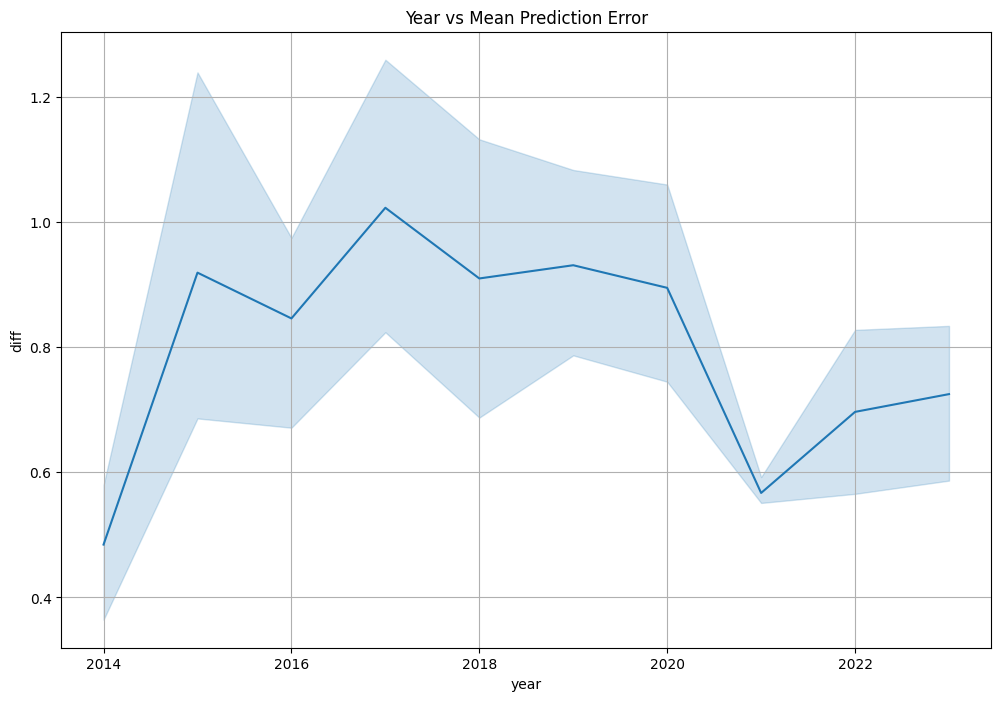

In [256]:
plt.figure(figsize=(12,8))
sns.lineplot(x = "year", y = "diff", data=x,)
plt.title("Year vs Mean Prediction Error")
plt.grid()
plt.show()

***BONUS: En hatalı tahminler***

In [270]:
predictions_df.sort_values(by = "diff",ascending=False).head(5)

,prediction,y_test,card_set,card_name,diff
617,9.740131,4,BLACK_TEMPLE,Magtheridon,5.740131
101,2.741035,8,TROLL,"Hir'eek, the Bat",5.258965
155,4.549481,9,GANGS,Mayor Noggenfogger,4.450519
473,4.589385,9,DARKMOON_FAIRE,Carnival Clown,4.410615
24,8.258276,4,LOOTAPALOOZA,The Darkness,4.258276


- Magtheridon :  dormant mekaniği ve karışık kart özelliği
-  Hir-eek : 1 attack ve 1 defansa sahip bir kart fakat kartın text özellikleri  kartı güçlü yapıyor
- Mayor Noggenfogger : 9 manalık bir karta göre attack ve defansı az fakat text özellikleri kartı güçlü yapıyor
- The Darkness : kart 20-20 ama çok karışık bir battlecry 'ı var bu da modelin kartın dengeleyici gücünü atlamasına sebep oluyor.
